In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

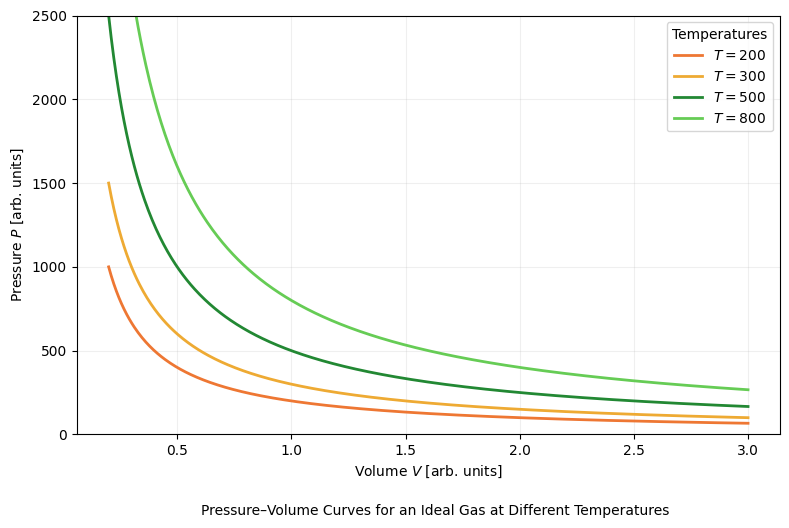

In [8]:
import numpy as np
import matplotlib.pyplot as plt

OG_COLORS = ["#EE7733", "#EEAA33", "#228833", "#66CC55"]

V = np.linspace(0.2, 3, 500)
temperatures = [200, 300, 500, 800]
n = 1
R = 1

plt.figure(figsize=(8, 5))

for T, col in zip(temperatures, OG_COLORS):
    P = n * R * T / V
    plt.plot(V, P, color=col, linewidth=2, label=f"$T = {T}$")

plt.ylim(0, 2500)
plt.xlabel("Volume $V$ [arb. units]")
plt.ylabel("Pressure $P$ [arb. units]")
plt.legend(title="Temperatures", loc="upper right")
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55, y=-0.04,
    s="Pressure–Volume Curves for an Ideal Gas at Different Temperatures",
    ha="center"
)

plt.show()